### Project Description

#### What is Customer Segmentation? 
#### -> Customer segmentation is the process of identifying different groups of customers based on the category they belong such as demographics or behaviors so that the sales/marketing team can reach out to those specific customers effectively.

#### -> When you perform customer segmentation, you find similar characteristics in each customer’s behaviour and needs. Then, those are generalized into 
#### groups to satisfy demands with various strategies. Moreover, those strategies can be an input of the:

#### i) Focused marketing efforts on particular demographics#### ii) Iintroduction of features in line with user deman
#### iii) Creation of the product roadmapap

#### We are going perform segmentation by using the following 3 algorithms

##### i) K-means
##### ii) Hierarchical
##### iii) DBSCAN (Density Based Spatial Clustering of Applications with Noise)

#### Primary goal to help data supermarket increase their business by getting more memberships.
#### for this we will try and explore different clustering techniques and perform a customer segmentation. That is nothing but identifying and making groups based on some 
#### similar characteristics of customer preferences and purchasing history and allow companies to market to each gorup more efficiently. 
#### We shall further develop some clustering models to gain better understandidng of the type of the customer.
#### This includes clustering algorithms such as K-means, Hierarchical Clustering and DBSCAN.

#### Data Overview

###### The data consists of 200 customers with information related to their age, gender, annual income, and spending score. 
###### The spending score is a numeric variable ranging from 1 to 100 and was assigned to customers based on behavior parameters and purchasing data.
###### The data set also contains the customer's ID, which will be dropped before beginning the analysis.

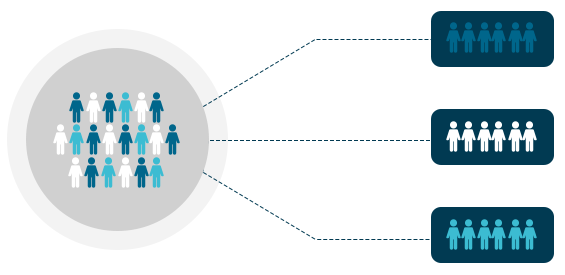

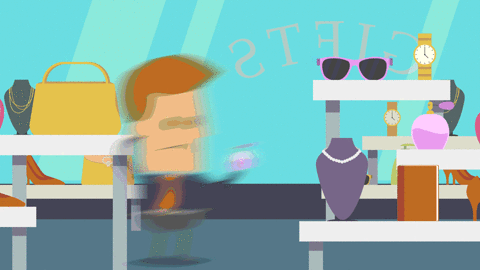

Let us now import some python libraries that required to perform further analysis 

In [47]:
# import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import seaborn as sns
# # init_notebook_mode(connected = true)
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples,silhouette_score
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram
# from sklearn.cluster import DBSCAN
# from collections import Counter
# from sklearn.decomposition import PCA

import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


In [48]:
cust_data = pd.read_csv('Mall_Customers (1).csv')
cust_data.head(20)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                      15
13          14  Female   24                  20                      77
14          15    Male   37                  20                      13
15          16    Male   22                  20                      79
16          17  Female   35                  21                      35
17          18    Male   20                  21                      66
18          19    Male   52                  23                      29
19          20  Female   35                  23                      98

### Data Summary 

In [49]:
#.shpae function returns the dimensions for the given dataset i.e. number of rows and columns
# In following case we have 200 rows and 5 columns
cust_data.shape

(200, 5)

In [50]:
# this method is used to get a statistical overview of the dataset it includes mean total count standard deviation etc.
cust_data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [51]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
#Here we are checking if there are any null values in the dataset.
cust_data.isnull().values.any()

False

In [53]:
cust_data.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)

### EDA (Exploratory Data Analysis)

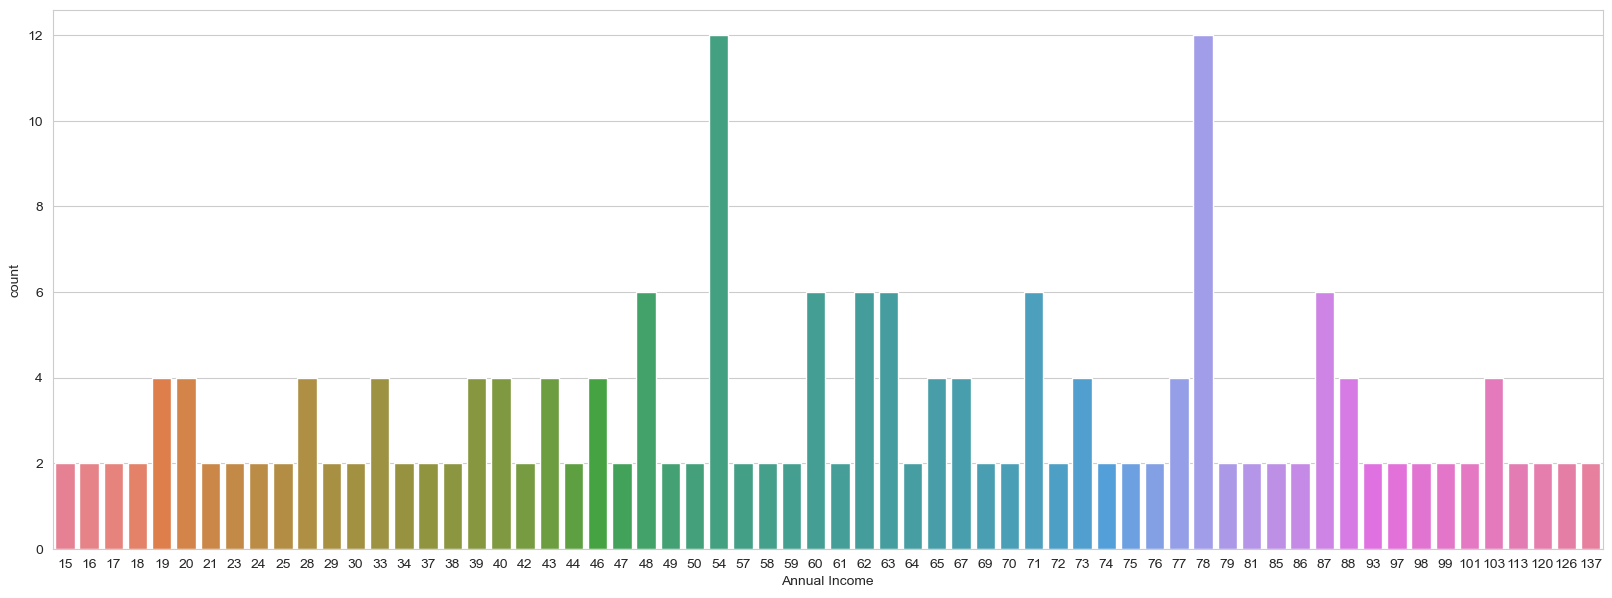

In [54]:
# Here we are counting the number of customers based on their annual income.

sns.set_style('whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x="Annual Income", data=cust_data, palette='husl');

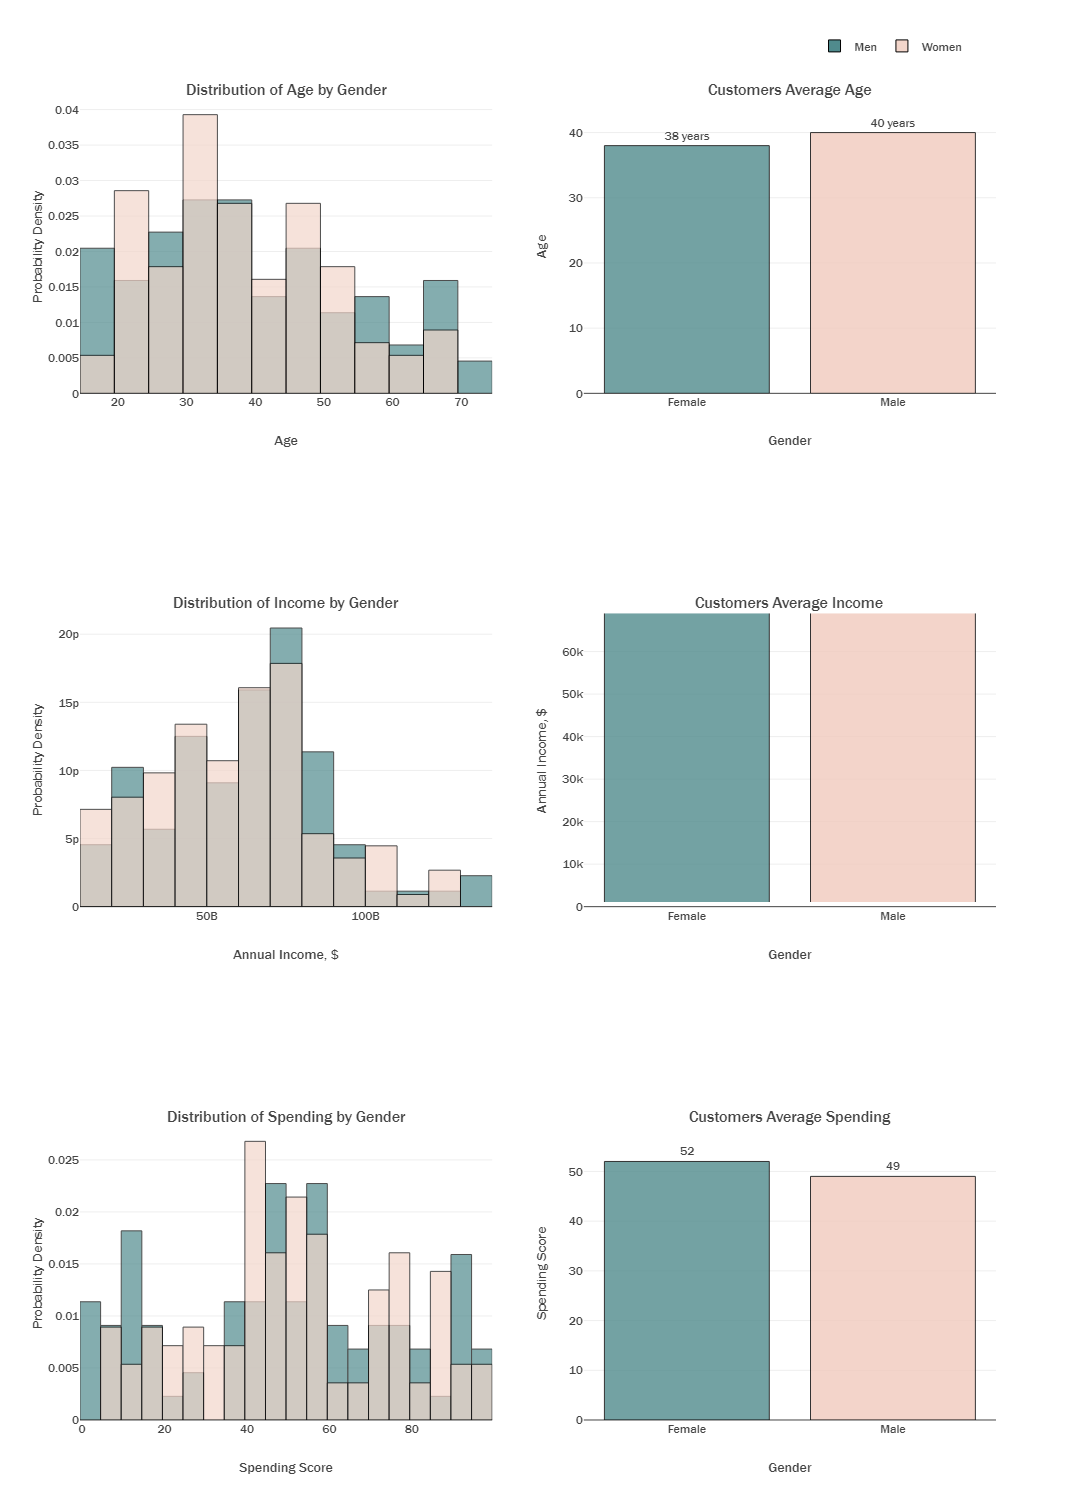

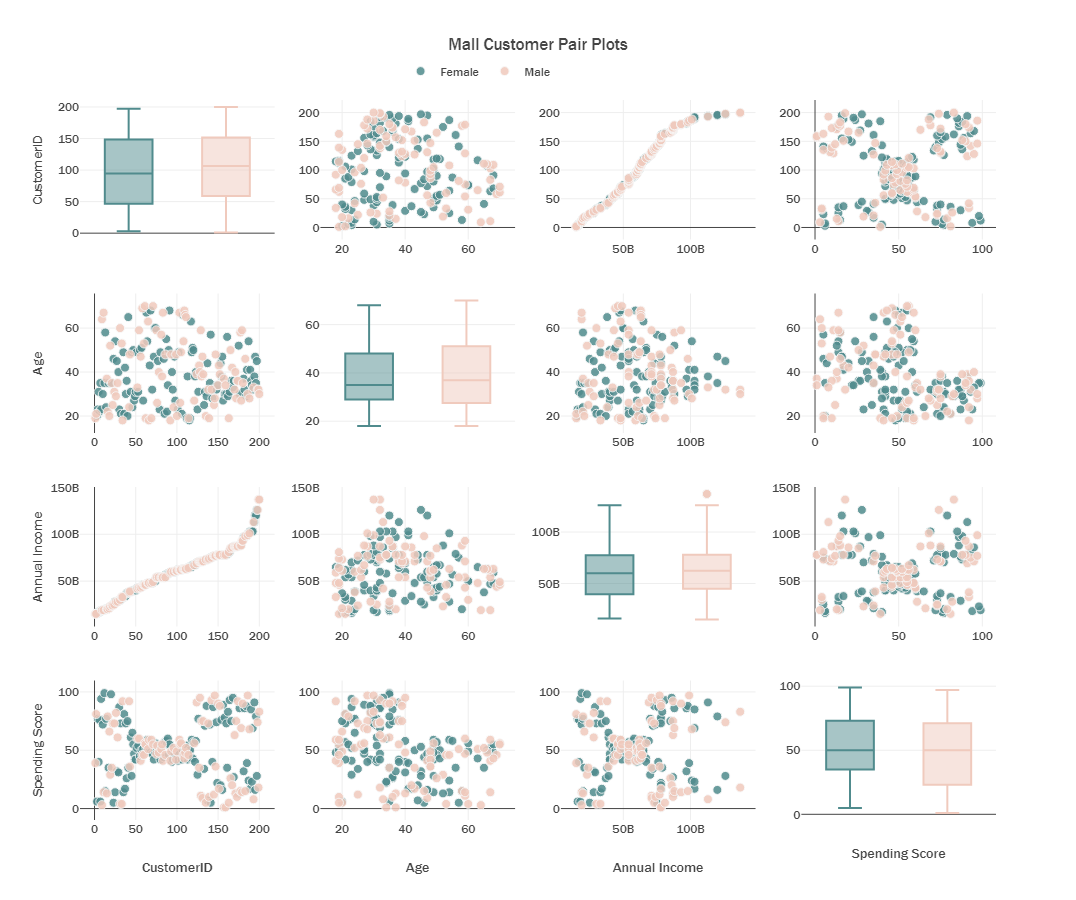

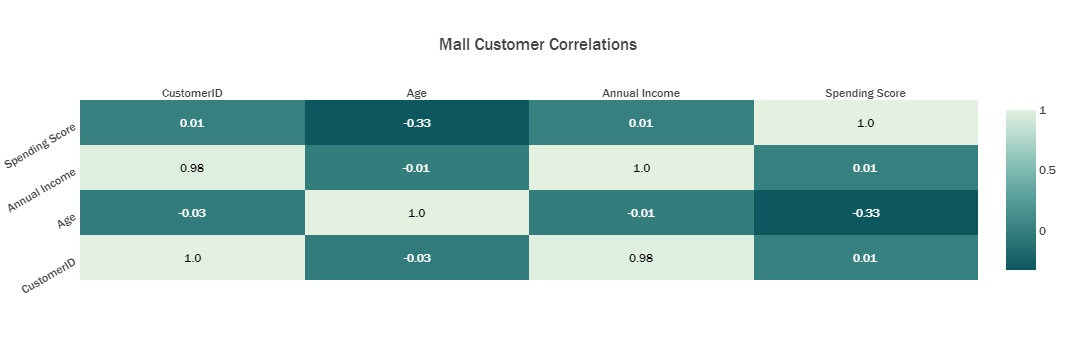

In [65]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Assuming cust_data is your DataFrame containing customer data

# Modify cust_data to convert 'Annual Income' to dollars
cust_data['Annual Income'] = cust_data['Annual Income'].mul(1000)

# Grouping data for plots
p1 = cust_data.groupby('Gender')['Age'].mean().round(0).astype(int).reset_index()
p2 = cust_data.groupby('Gender')['Annual Income'].mean().reset_index()
p3 = cust_data.groupby('Gender')['Spending Score'].mean().round(0).astype(int).reset_index()

# Creating a layout template
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

# Creating subplots
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Distribution of Age by Gender",
                                    "Customers Average Age",
                                    "Distribution of Income by Gender",
                                    "Customers Average Income",
                                    "Distribution of Spending by Gender",
                                    "Customers Average Spending")
                   )

# Adding histograms for age distribution by gender
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Male']['Age'], histnorm='probability density',
                           marker=dict(color='#508B8D', opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Men"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Female']['Age'], histnorm='probability density',
                           marker=dict(color='#F3D6CB', opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Women"),
              row=1, col=1)

# Adding bar chart for average age by gender
fig.add_trace(go.Bar(x=p1['Gender'], y=p1['Age'], text=p1['Age'], texttemplate='%{text} years', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8), width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} years<extra></extra>', showlegend=False),
              row=1, col=2)

# Adding histograms for income distribution by gender
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Male']['Annual Income'], histnorm='probability density',
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Female']['Annual Income'], histnorm='probability density',
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=2, col=1)

# Adding bar chart for average income by gender
fig.add_trace(go.Bar(x=p2['Gender'], y=p2['Annual Income'], text=p2['Annual Income'],
                     texttemplate='$%{text:,.0f}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8), width=.8,
                     hovertemplate='Average Income Among %{x} = $%{y}<extra></extra>', showlegend=False),
              row=2, col=2)

# Adding histograms for spending score distribution by gender
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Male']['Spending Score'], histnorm='probability density',
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Histogram(x=cust_data[cust_data.Gender == 'Female']['Spending Score'], histnorm='probability density',
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=3, col=1)

# Adding bar chart for average spending score by gender
fig.add_trace(go.Bar(x=p3['Gender'], y=p3['Spending Score'], text=p3['Spending Score'],
                     texttemplate='%{text}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8), width=.8,
                     hovertemplate='Average Spending Score Among %{x} = %{y}<extra></extra>', showlegend=False),
              row=3, col=2)

# Updating traces and layout
fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(template=temp, barmode='overlay', height=1500, width=700,
                  legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.03, x=.97),
                  xaxis1_title="Age", yaxis1_title='Probability Density',
                  xaxis2_title="Gender", yaxis2_title="Age", yaxis2_range=[0, 45],
                  xaxis3_title="Annual Income, $", yaxis3_title='Probability Density',
                  xaxis4_title="Gender", yaxis4_title="Annual Income, $", yaxis4_range=[0, 69e3],
                  xaxis5_title="Spending Score", yaxis5_title='Probability Density',
                  xaxis6_title="Gender", yaxis6_title="Spending Score", yaxis6_range=[0, 59]
                  )
fig.show()

# Pairplots
fig = ff.create_scatterplotmatrix(cust_data, diag='box', index='Gender', colormap=['#508B8D', '#F0CABD'])
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Mall Customer Pair Plots", template=temp,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=900, width=700)
fig.show()

# Excluding non-numeric columns before calculating correlations
numeric_data = cust_data.select_dtypes(include=['number'])
corr = numeric_data.corr()

# Plotting correlation heatmap
x = corr.columns.tolist()
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint',
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Mall Customer Correlations", yaxis_tickangle=-30)
fig.show()

### Plotting Distribution for each Column in dataset


In [61]:
def distributionPlot(columnName):
    if not columnName == 'Gender':
        plt.figure()
        sns.distplot(cust_data[columnName], color="yellow", rug=True);

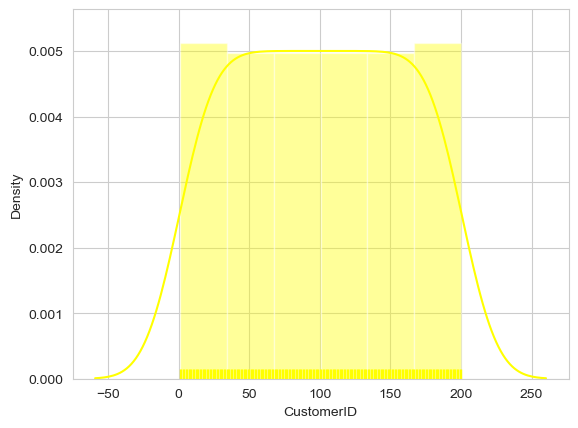

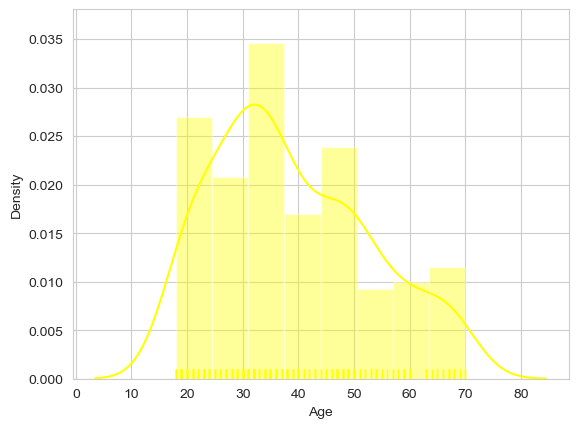

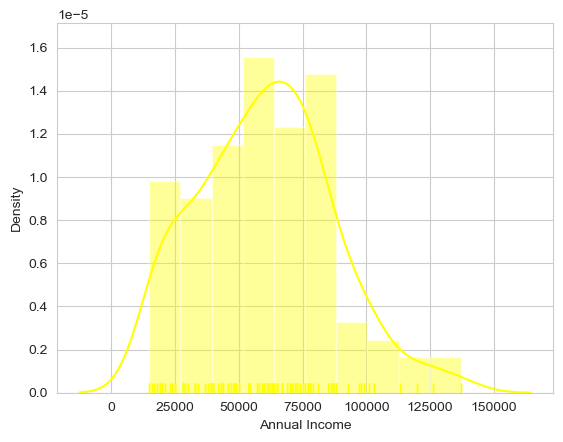

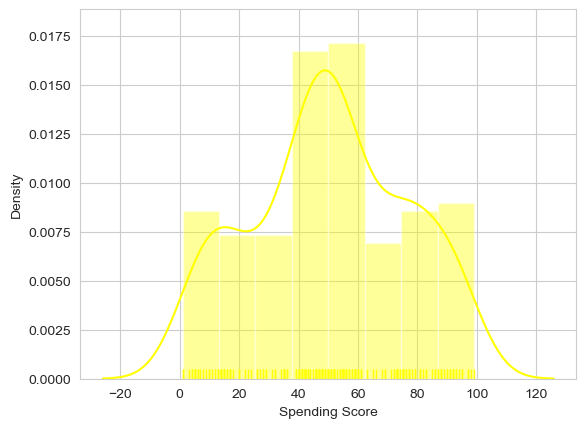

In [62]:
for column in cust_data.columns:
    distributionPlot(column)

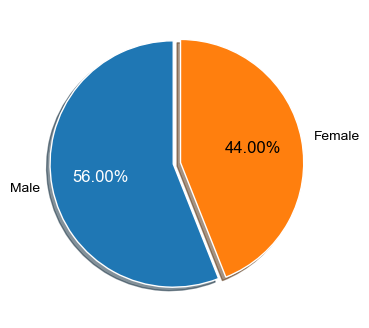

In [63]:
values = cust_data['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode)

plt.setp(texts, color='black')
plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')
plt.show()

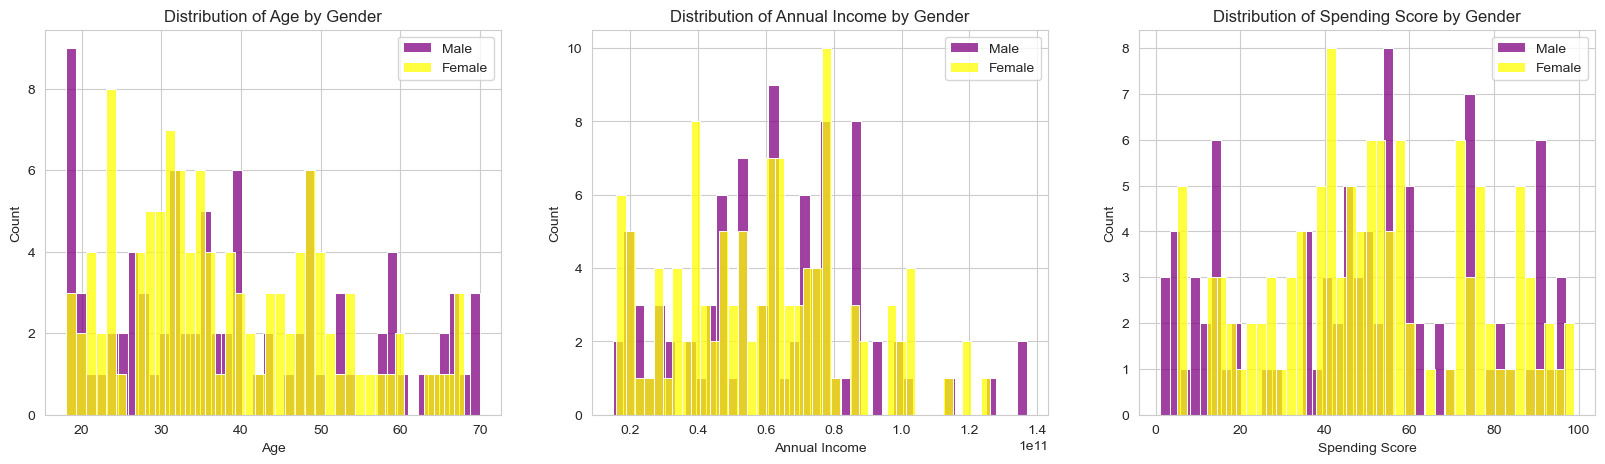

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Plotting histograms for Age
sns.histplot(cust_data[cust_data['Gender'] == 'Male']['Age'], bins=40, ax=ax[0], color='purple', label='Male')
sns.histplot(cust_data[cust_data['Gender'] == 'Female']['Age'], bins=40, ax=ax[0], color='yellow', label='Female')
ax[0].set_title('Distribution of Age by Gender')
ax[0].legend()

# Plotting histograms for Annual Income
sns.histplot(cust_data[cust_data['Gender'] == 'Male']['Annual Income'], bins=40, ax=ax[1], color='purple', label='Male')
sns.histplot(cust_data[cust_data['Gender'] == 'Female']['Annual Income'], bins=40, ax=ax[1], color='yellow', label='Female')
ax[1].set_title('Distribution of Annual Income by Gender')
ax[1].legend()

# Plotting histograms for Spending Score
sns.histplot(cust_data[cust_data['Gender'] == 'Male']['Spending Score'], bins=40, ax=ax[2], color='purple', label='Male')
sns.histplot(cust_data[cust_data['Gender'] == 'Female']['Spending Score'], bins=40, ax=ax[2], color='yellow', label='Female')
ax[2].set_title('Distribution of Spending Score by Gender')
ax[2].legend()

plt.show()

### Let's move onto creating model

#### We will now use elbow method to get the number ideal clusters

#### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Since we do 
#### not have any predefined number of clusters in unsupervised learning. We tend to use some method that can help us decide the best number of clusters. 
#### In the case of K-Means clustering, we use Elbow Method for defining the best number of clustering.

#### A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Since we do
#### not have any predefined number of clusters in unsupervised learning. We tend to use some method that can help us decide the best number of 
#### clusters.  In the case of K-Means clustering, we use Elbow Method for defining the best number of clustering 

#### For determining  K(numbers of clusters) we use Elbow method.  Elbow Method is a technique that we use to determine the number of centroids(k) to 
#### use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the 
#### hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value.
#### WCSS - It is defined as the sum of square distances between the centroids and each points..



#### Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value. 




ref - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/e.

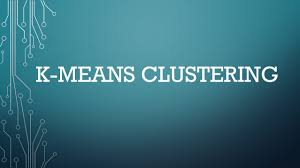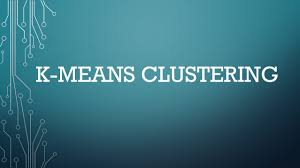

#### The first clustering technique we will explore is K-Means Clustering. K-Means Clustering is a simple yet powerful clustering method that creates  k

#### distinct segments of the data where the variation within the clusters is as small as possible. To find the optimal number of clusters, I will try 
#### different values of  k

#### and calculate the inertia, or distortion score, for each model. Inertia measures the cluster similarity by computing the total distance between the 
#### data points and their closest cluster center. Clusters with similar observations tend to have smaller distances between them and a lower distortion score overall.

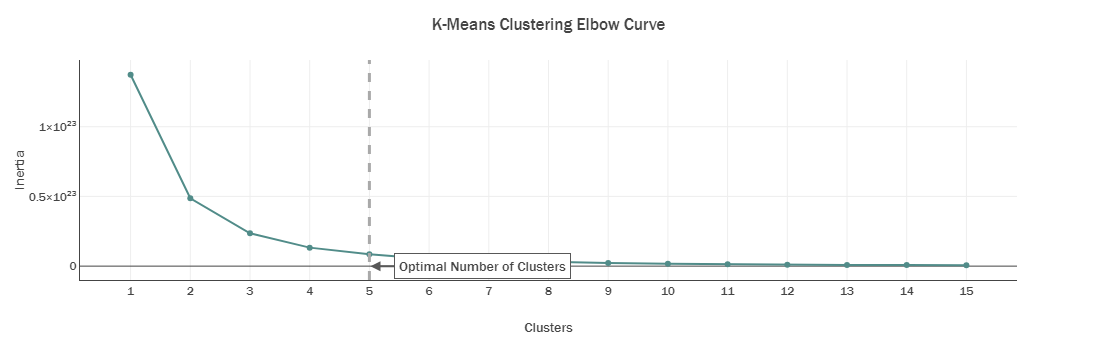

In [106]:
# K-Means Clustering
clust_df = cust_data.copy()
clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

k_means = list()
for clust in range(1,16):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=21).fit(clust_df)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

# Plot results
plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Number of Clusters",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Clustering Elbow Curve", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()

#### The graph above shows the inertia values for each K-Means model with clusters between 1 and 15. The inflection point in the graph occurs at about

#### 5 clusters, where the inertia begins to plateau. This indicates that the optimal number of clusters, k  is equal to 5. Below is a plot of the clusters

####  based on their spending score and income.